In [ ]:
#This dataset is aimed at predicting anaemia based on hemoglobin levels and color pixel distribution from associated images.

Predicting Anaemia from image pixel and hemoglobin levels anaemia is a condition that occurs when your blood doesn't have enough red blood cell or hemoglobin to carry oxygen to your tissue.

Color pixel distribution data obtained from related clinical imagining with hemoglobin levels. A unique instance is represented by each row in the dataset, which contains a range of attributes such as clinical symptos, medical history, and demographic data. Lower hemoglobin levels are generally indicative of anaemia. Hemoglobin levels are measured in grams per deci liter (g/dL) and offer a direct association with the disorder.

In [ ]:
import pandas as pd
df=pd.read_csv('python_project.csv',names=['number','sex','red_pixel','green_pixel','blue_pixel','hemoglobin','anaemia'],header=0)
df.head()

,number,sex,red_pixel,green_pixel,blue_pixel,hemoglobin,anaemia
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [ ]:
df.tail()

,number,sex,red_pixel,green_pixel,blue_pixel,hemoglobin,anaemia
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No
103,104,F,43.5706,29.8094,26.6199,12.2,No


In [ ]:
df.shape

(104, 7)

In [ ]:
df.describe()

,number,red_pixel,green_pixel,blue_pixel,hemoglobin
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   number       104 non-null    int64  
 1   sex          104 non-null    object 
 2   red_pixel    104 non-null    float64
 3   green_pixel  104 non-null    float64
 4   blue_pixel   104 non-null    float64
 5   hemoglobin   104 non-null    float64
 6   anaemia      104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [ ]:
df.isna().any()

,0
number,False
sex,False
red_pixel,False
green_pixel,False
blue_pixel,False
hemoglobin,False
anaemia,False


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
lebelfit= le.fit(df['sex'])
df['sex']=le.fit_transform(df['sex'])
df.head()

,number,sex,red_pixel,green_pixel,blue_pixel,hemoglobin,anaemia
0,1,2,43.2555,30.8421,25.9025,6.3,Yes
1,2,0,45.6033,28.1900,26.2067,13.5,No
2,3,1,45.0107,28.9677,26.0215,11.7,No
3,4,0,44.5398,28.9899,26.4703,13.5,No
4,5,3,43.2870,30.6972,26.0158,12.4,No


In [ ]:
labelfit=le.fit(df['anaemia'])
df['anaemia']=le.fit_transform(df['anaemia'])
df.head()

,number,sex,red_pixel,green_pixel,blue_pixel,hemoglobin,anaemia
0,1,2,43.2555,30.8421,25.9025,6.3,1
1,2,0,45.6033,28.1900,26.2067,13.5,0
2,3,1,45.0107,28.9677,26.0215,11.7,0
3,4,0,44.5398,28.9899,26.4703,13.5,0
4,5,3,43.2870,30.6972,26.0158,12.4,0


In [ ]:
corln= df.corr()['anaemia']
print(corln)


number         0.053997
sex           -0.165267
red_pixel     -0.353376
green_pixel    0.566447
blue_pixel     0.057844
hemoglobin    -0.766506
anaemia        1.000000
Name: anaemia, dtype: float64


In [ ]:
dpl_rows= df.duplicated().sum()
print(dpl_rows)

0


In [ ]:
columns=df.columns
print(columns)

Index(['number', 'sex', 'red_pixel', 'green_pixel', 'blue_pixel', 'hemoglobin',
       'anaemia'],
      dtype='object')


In [ ]:
for i in columns:
  print(df[i].value_counts())
  print('\n')

number
1      1
2      1
3      1
4      1
5      1
      ..
100    1
101    1
102    1
103    1
104    1
Name: count, Length: 104, dtype: int64


sex
3    29
2    26
0    26
1    23
Name: count, dtype: int64


red_pixel
44.1609    2
45.6033    1
43.2555    1
44.5398    1
43.2870    1
          ..
49.9999    1
42.2324    1
45.6064    1
45.2095    1
43.5706    1
Name: count, Length: 103, dtype: int64


green_pixel
29.5993    2
28.1900    1
30.8421    1
28.9899    1
30.6972    1
          ..
29.2860    1
30.6757    1
31.9084    1
29.2769    1
29.8094    1
Name: count, Length: 103, dtype: int64


blue_pixel
26.2399    2
26.2067    1
25.9025    1
26.4703    1
26.0158    1
          ..
20.7141    1
27.0919    1
22.4852    1
25.5136    1
26.6199    1
Name: count, Length: 103, dtype: int64


hemoglobin
13.0    5
14.1    5
14.5    4
12.4    3
12.6    3
       ..
11.0    1
11.3    1
10.7    1
13.2    1
12.2    1
Name: count, Length: 62, dtype: int64


anaemia
0    78
1    26
Name: count, dtype:

In [ ]:
for i in columns:
  print(df[i].unique(),i)
  print('\n')

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104] number


[2 0 1 3] sex


[43.2555 45.6033 45.0107 44.5398 43.287  45.0994 43.1457 43.6103 45.0423
 46.5143 45.3506 44.4062 44.9642 45.0484 46.9942 45.5842 42.5358 44.0957
 45.7104 40.9365 44.9116 43.4225 43.3019 47.6372 45.6906 43.4098 44.4252
 44.3297 47.8913 42.2473 44.2572 48.6358 42.1652 45.4434 42.1528 45.2588
 46.4081 47.2275 47.3642 46.1449 41.7122 47.9777 46.7628 44.9526 44.1868
 46.9428 48.8523 45.7581 48.5356 45.5833 45.9659 44.0418 43.9633 47.1003
 46.0477 46.2133 49.1475 45.7986 40.6395 50.3562 43.9224 45.0693 45.8483
 43.4837 38.7968 45.4201 44.1609 42.5892 

In [ ]:
df['hemoglobin'].min()

2.8

In [ ]:
df['hemoglobin'].max()

16.3

In [ ]:
df['hemoglobin'].mean()

np.float64(12.150961538461537)

In [ ]:
df['hemoglobin'].median()

12.6

**SCATTER PLOT**

1. Hemoglobin levels against each color pixel percentage. It will help us to see if there is a linear or non linear relationship between hemoglobin levels and each of the color percentage


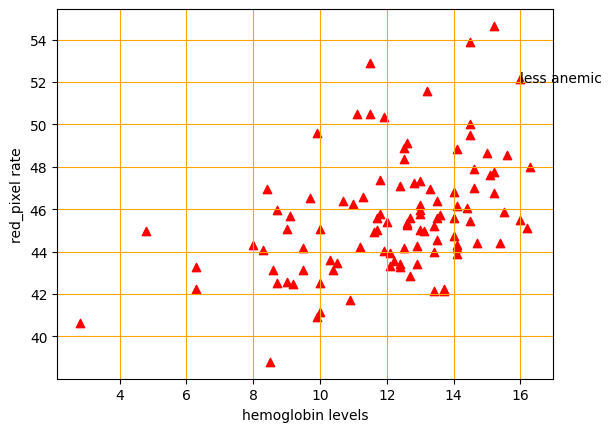

In [ ]:
import matplotlib.pyplot as plt

hemo=df.hemoglobin
red_pixel=df.red_pixel

plt.scatter(hemo,red_pixel,marker='^',color='r')

plt.grid(True,color='orange')
plt.xlabel('hemoglobin levels')
plt.ylabel('red_pixel rate')
plt.text(x=16,y=52,s='less anemic')
plt.show()

1. There might be a correlation btw the percentage of red pixels and hb levels.
2. Indicating that as the red pixel percentage increases.
3. The hb level also increase.


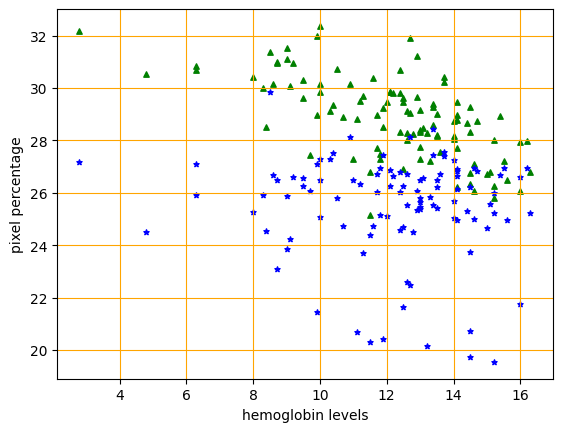

In [ ]:
import matplotlib.pyplot as plt

hemo=df.hemoglobin
green_pixel=df.green_pixel
blue_pixel=df.blue_pixel

plt.grid(True,color='orange')

plt.scatter(hemo,green_pixel,marker='^',color='g',s=15)
plt.scatter(hemo,blue_pixel,marker='*',color='b',s=15)

plt.xlabel('hemoglobin levels')
plt.ylabel('pixel percentage')

plt.show()

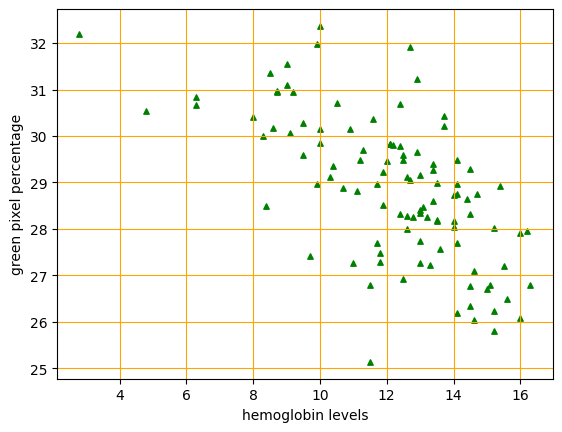

In [ ]:
import matplotlib.pyplot as plt

hemo=df.hemoglobin
green_pixel=df.green_pixel
blue_pixel=df.blue_pixel

plt.grid(True,color='orange')

plt.scatter(hemo,green_pixel,marker='^',color='g',s=15)

plt.xlabel('hemoglobin levels')
plt.ylabel('green pixel percentage')
plt.show()


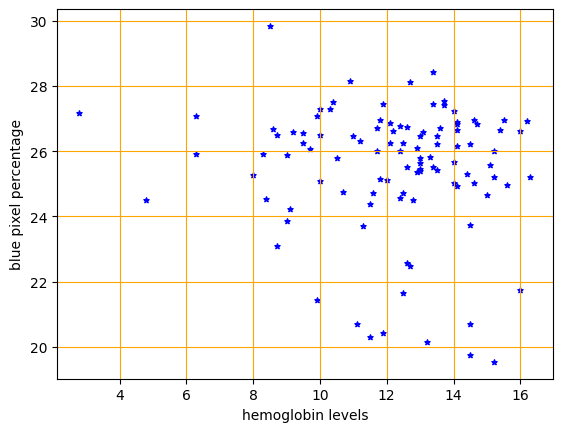

In [ ]:
hemo=df.hemoglobin
blue_pixel=df.blue_pixel

plt.grid(True,color='orange')

plt.scatter(hemo,blue_pixel,marker='*',color='b',s=15)

plt.xlabel('hemoglobin levels')
plt.ylabel('blue pixel percentage')
plt.show()

In this plot,
1. Green and blue pixel doesn't have a strong relationship between hemoglobin levels

**HISTOGRAM**

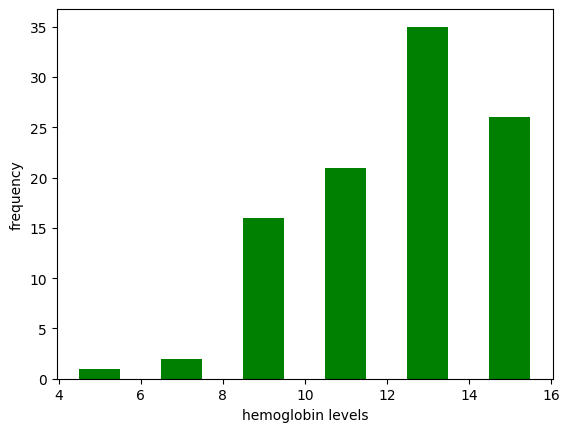

In [ ]:
import matplotlib.pyplot as plt

hemo=df.hemoglobin
plt.hist(hemo,bins=[4,6,8,10,12,14,16],color='g',rwidth=0.50)
plt.xlabel('hemoglobin levels')
plt.ylabel('frequency')
plt.show()

This histogram of hemoglobin levels shows how frequently different hemoglobin levels occur within this dataset.
Here, 12-14 grams per decliter(g/dL) hb i having higher frequency in this dataset.

**LM PLOT**

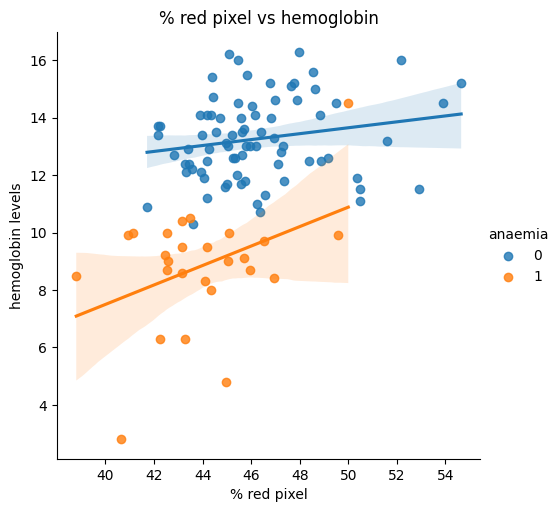

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='red_pixel', y='hemoglobin',hue='anaemia',data=df)
plt.title('% red pixel vs hemoglobin')
plt.xlabel('% red pixel')
plt.ylabel('hemoglobin levels')
plt.show()

In this plot, increasing red pixel rate will also increase the hemoglobin level the individual with higher hemoglobin level will be non-anemic.

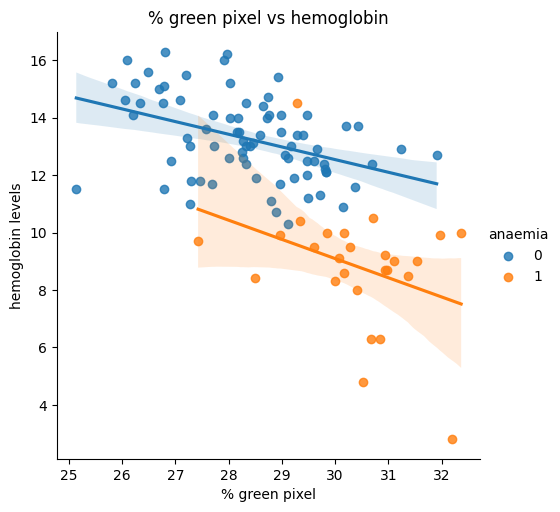

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='green_pixel', y='hemoglobin',hue='anaemia',data=df)
plt.title('% green pixel vs hemoglobin')
plt.xlabel('% green pixel')
plt.ylabel('hemoglobin levels')
plt.show()

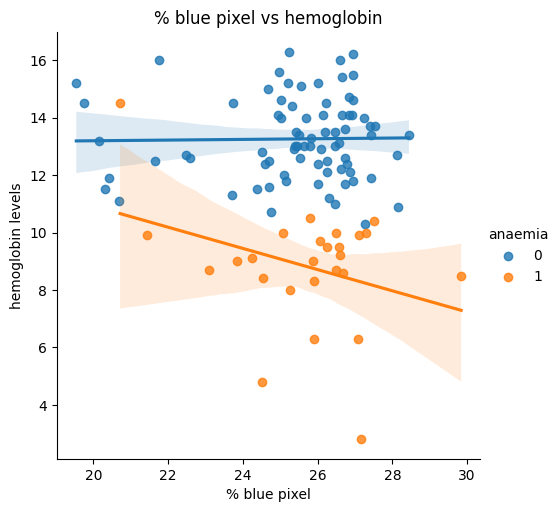

In [ ]:
sns.lmplot(x='blue_pixel', y='hemoglobin',hue='anaemia',data=df)
plt.title('% blue pixel vs hemoglobin')
plt.xlabel('% blue pixel')
plt.ylabel('hemoglobin levels')
plt.show()

Green and blue pixel does not have a strong relationship between hemoglobin levels.

**BOXPLOT**

Hemoglobin levels for anemic and non-anemic individuals

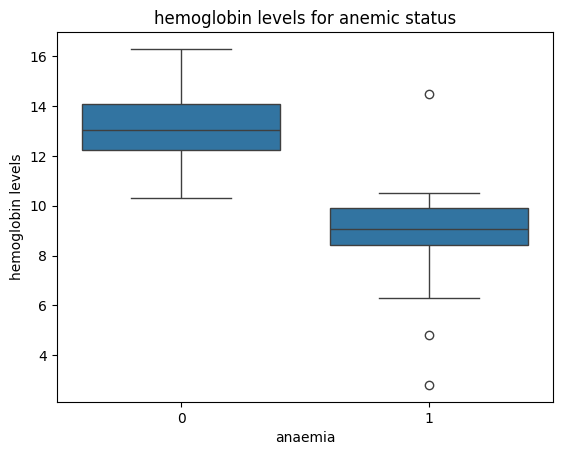

In [ ]:
sns.boxplot(x='anaemia',y='hemoglobin',data=df)
plt.title('hemoglobin levels for anemic status')
plt.xlabel('anaemia')
plt.ylabel('hemoglobin levels')
plt.show()

Here, this box plot show a clear sepration between the hb levels of anemic and non anemic individuals. Anemic individuals will generally have lower hb levels, indicating a clear distinction between the 2 groups.

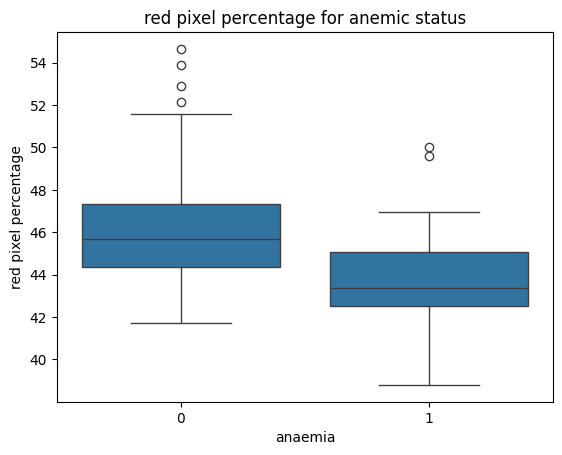

In [ ]:
sns.boxplot(x='anaemia',y='red_pixel',data=df)
plt.title('red pixel percentage for anemic status')
plt.xlabel('anaemia')
plt.ylabel('red pixel percentage')
plt.show()

The person that have anemia shows higher amount green pixel rather than the non anemic individuals.

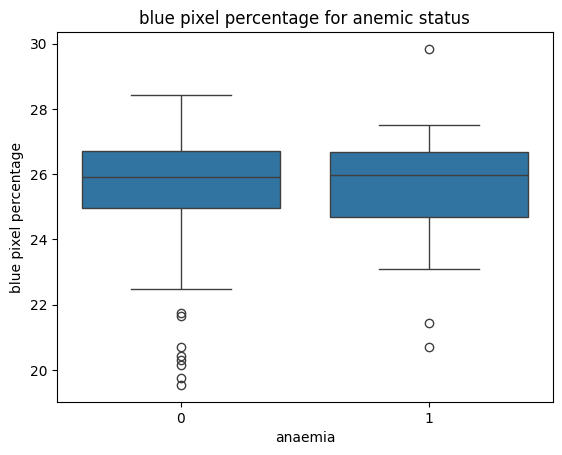

In [ ]:
sns.boxplot(x='anaemia',y='blue_pixel',data=df)
plt.title('blue pixel percentage for anemic status')
plt.xlabel('anaemia')
plt.ylabel('blue pixel percentage')
plt.show()

Similar to the green pixel percentage, if the median and IQR do not show significant differences, it suggests that the blue pixel percentage is also not a reliable indicator for anemia status.

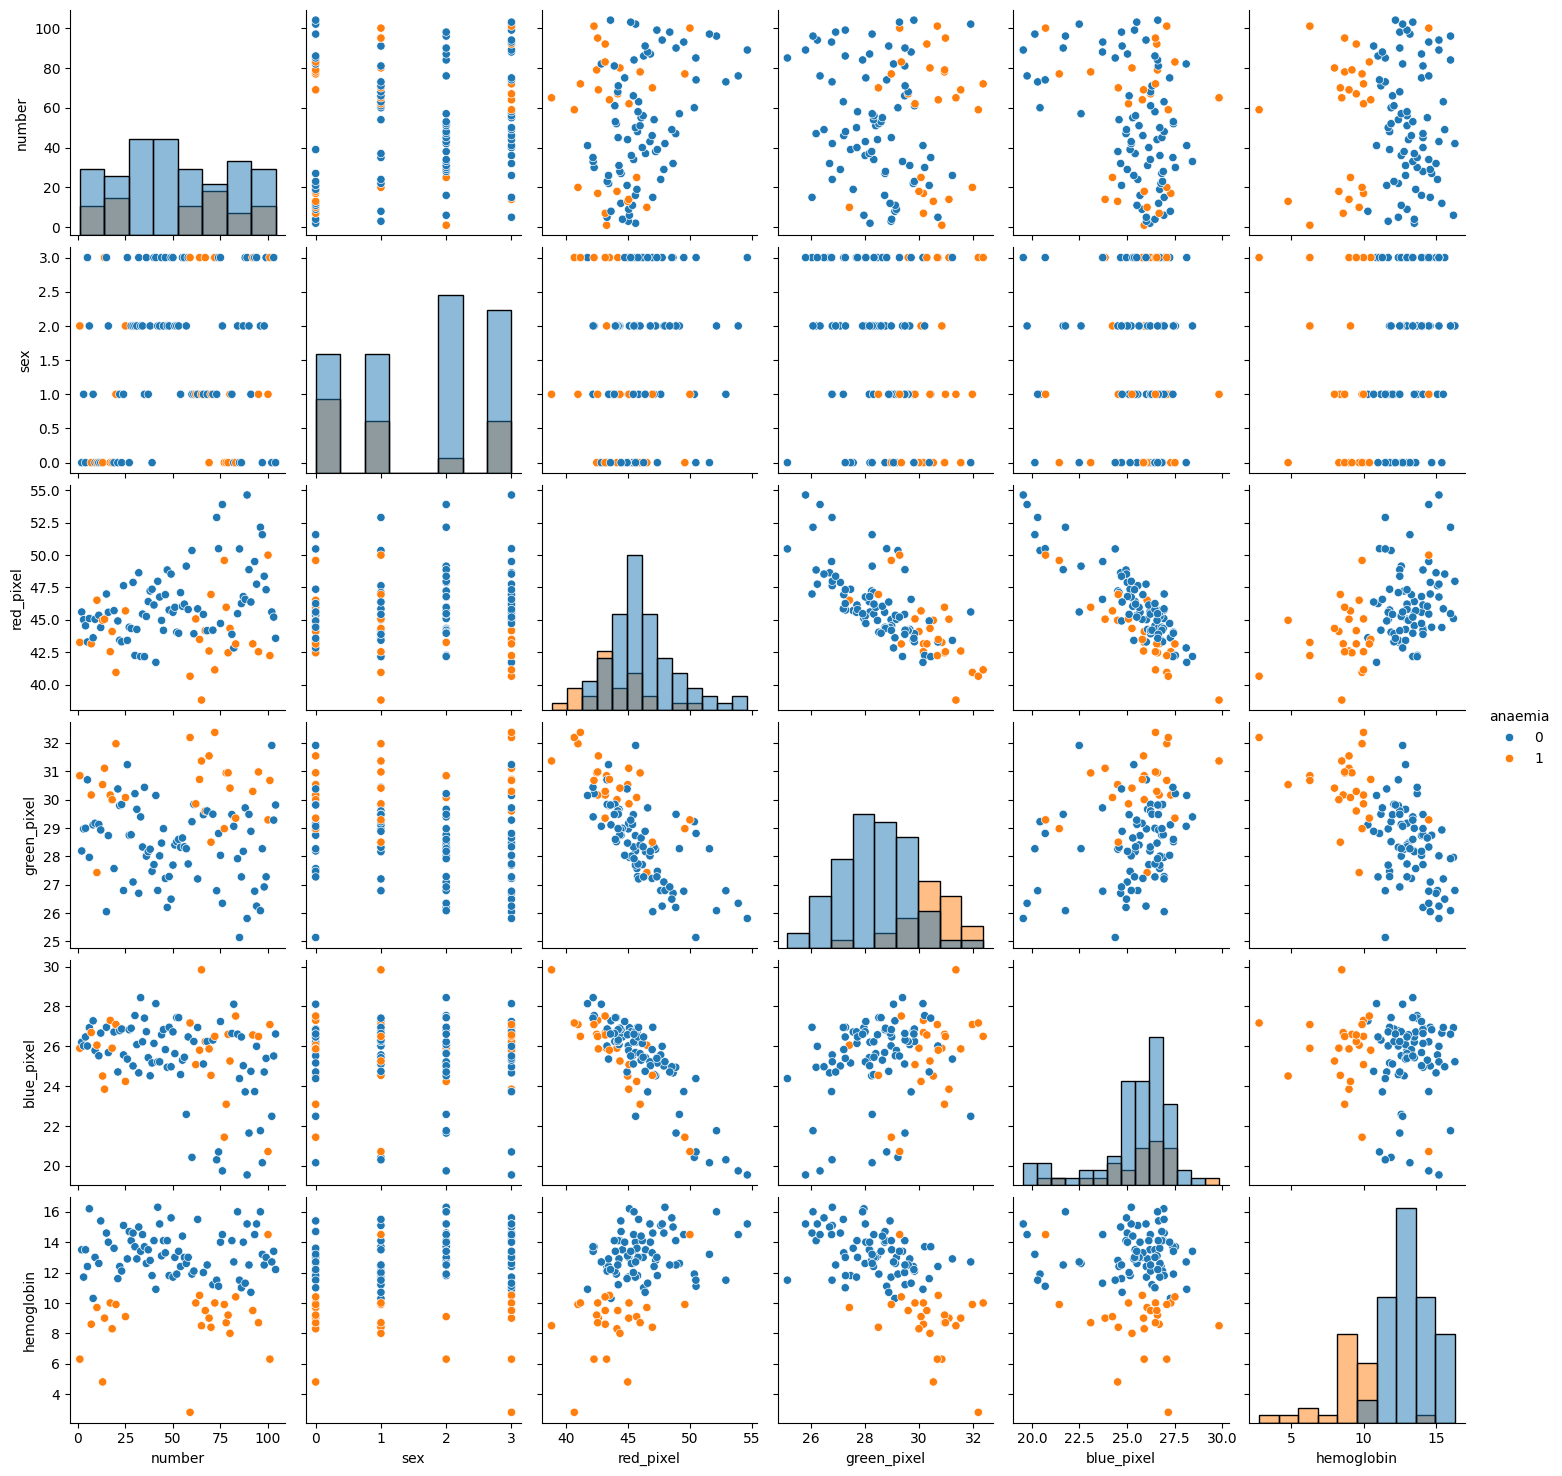

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df,hue='anaemia',diag_kind='hist')
plt.show()

**HEATMAP**

A heatmap provides a visual representation of data where individuals value are represented by colors. When apllied to the aneamic dataset, a heatmap can show correlation between different columns.

               number       sex  red_pixel  green_pixel  blue_pixel  \
number       1.000000  0.138819   0.286166    -0.077089   -0.345707   
sex          0.138819  1.000000   0.098272    -0.170702   -0.005766   
red_pixel    0.286166  0.098272   1.000000    -0.732003   -0.845764   
green_pixel -0.077089 -0.170702  -0.732003     1.000000    0.255589   
blue_pixel  -0.345707 -0.005766  -0.845764     0.255589    1.000000   
hemoglobin  -0.019768  0.184634   0.424586    -0.637340   -0.103373   
anaemia      0.053997 -0.165267  -0.353376     0.566447    0.057844   

             hemoglobin   anaemia  
number        -0.019768  0.053997  
sex            0.184634 -0.165267  
red_pixel      0.424586 -0.353376  
green_pixel   -0.637340  0.566447  
blue_pixel    -0.103373  0.057844  
hemoglobin     1.000000 -0.766506  
anaemia       -0.766506  1.000000  


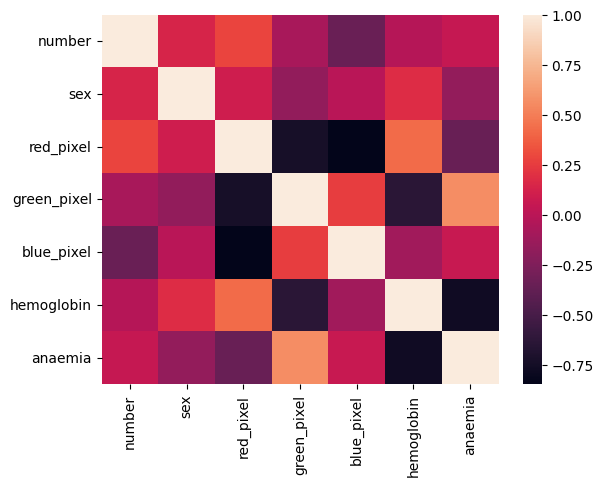

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
print(df.corr())
sns.heatmap(df.corr())
plt.show()


# Hemoglobin level and anemia status:
There is strong negative correlation between hemoglobin levels and anemia status. This means lower gemoglobin levels are associated with a higher likelihood of being anemic.

# Red pixel percentage and hemoglobin levels:
There is a moderate positive correlation between the percentage of red pixel and hemoglobin levels. This suggests that higher percentage of red pixels are associated with higher hemoglobin levels.

# green and blue pixel percentages:
There are weak or significant correlation between the percentages of green and blue pixels and hemoglobin levels. These color metrics do not appear to be reliable indicators of hemoglobin level or anemia status.

# Sex and hemoglobin levels:
There might be weak correlation between sex and hemoglobin levels, with males potentially having slightly higher hemoglobin levels on average compared to females. However, this relationship may not be strong or significant.

Hemoglobin levels are the primary indicators of anemia in this dataset.

The percentage of red pixels in the blood samples tends to be higher in individuals with normal hemoglobin levels, while those wih lower hemoglobin levels(indicative of aneamia) shows a higher percentage of green and blue pixels.

Individuals with a higher percentage of green and blue pixels in their blood sample images are at a higher risk of being aneamic.